##import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('monthly-car-sales-in-quebec-1960.csv')
dataset

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [ ]:
dataset['Sale']=dataset['Monthly car sales in Quebec 1960-1968']

del dataset['Monthly car sales in Quebec 1960-1968']

In [ ]:
dataset.Month=pd.to_datetime(dataset.Month,dayfirst=True)
dataset.set_index('Month',inplace=True)

In [ ]:
dataset.isnull().sum()

Sale    0
dtype: int64

In [ ]:
dataset=dataset.resample('M').mean()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 1960-01-31 to 1968-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sale    108 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [ ]:
dataset.isnull().sum()

Sale    0
dtype: int64

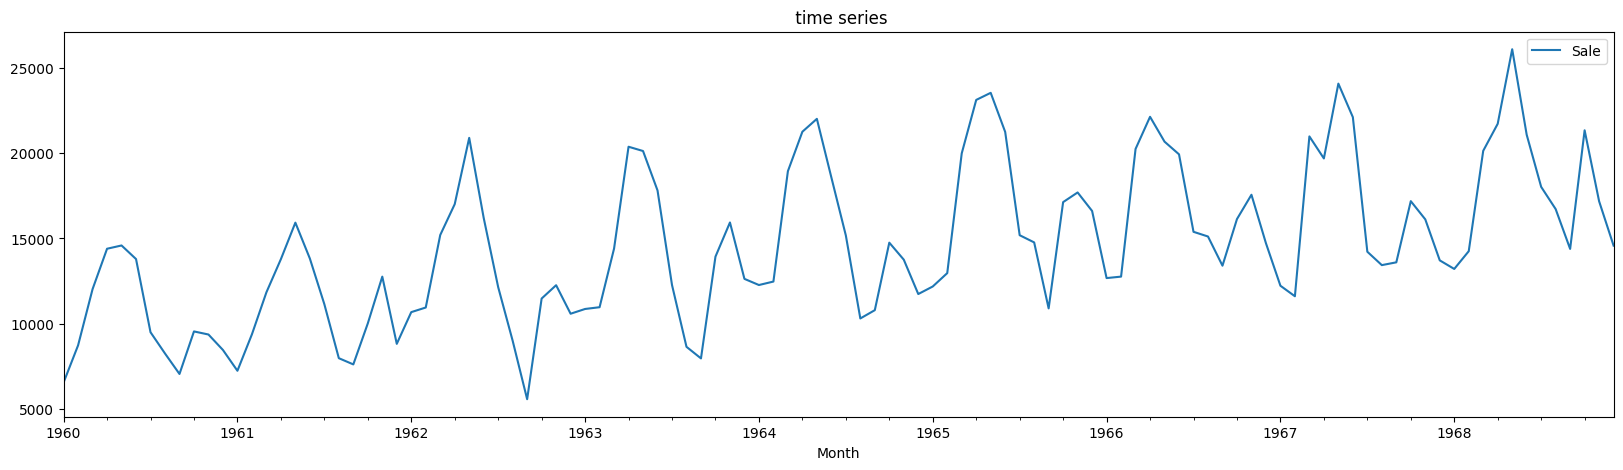

In [ ]:
dataset.plot(figsize=(20,5))

plt.title(' time series')
plt.show()

In [ ]:


#dataset=dataset.fillna(method='ffill')

##Series to Suprevised

In [ ]:
def to_supervised(train, n_input, n_out):
	# flatten data
	data = train
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input)))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)


##Choose the optimal Lag Observation using ACF plot

In [ ]:
import statsmodels.tsa.stattools as sts

In [ ]:
sts.adfuller(dataset.Sale)

(-1.2238127661752858,
 0.6632691049832861,
 12,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 1671.1995896872572)

In [ ]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

In [ ]:

dataset_diff=difference(dataset,1)

In [ ]:
dataset_diff=pd.DataFrame(dataset_diff)

In [ ]:
sts.adfuller(dataset_diff.iloc[:,0])

(-6.199799230800688,
 5.8447525992770696e-08,
 11,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 1654.0334866146452)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf 

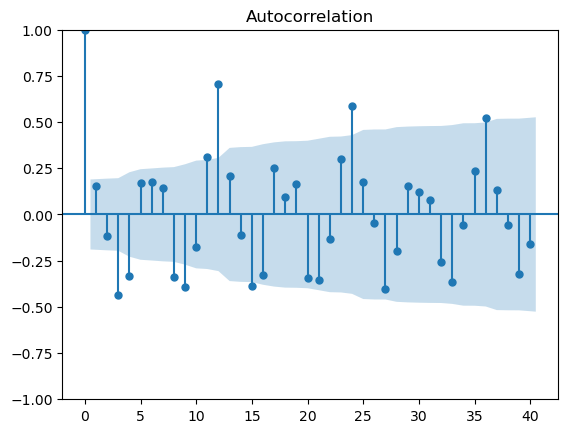

In [ ]:
plot_acf(dataset_diff, lags=40)   
plt.show()


In [ ]:
from numpy import array

In [ ]:
n_step=1
lag=12

In [ ]:
dataset=np.array(dataset)

In [ ]:
X,y=to_supervised(dataset,n_input=lag,n_out=n_step)

In [ ]:
X.shape ,y.shape

((96, 12), (96, 1))

##Train Test Split


In [ ]:
n_test=15

In [ ]:
x_train,x_test=X[:-n_test,:],X[-n_test:,:]


In [ ]:
y_train,y_test=y[:-n_test,:],y[-n_test:,:]

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((81, 12), (15, 12), (81, 1), (15, 1))

##Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [ ]:
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)
x_train.shape,y_train.shape

((81, 12), (81, 1))

In [ ]:
x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test)
x_test.shape,y_test.shape

((15, 12), (15, 1))

In [ ]:
x_test

array([[0.36294396, 0.47735108, 0.24949892, 0.04946685, 0.        ,
        0.60322756, 0.50290946, 0.84343238, 0.69082163, 0.07836139,
        0.01737916, 0.03010319],
       [0.47735108, 0.24949892, 0.04946685, 0.        , 0.75178385,
        0.50290946, 0.84343238, 0.69082163, 0.07836139, 0.01737916,
        0.03010319, 0.30855768],
       [0.24949892, 0.04946685, 0.        , 0.75178385, 0.64811994,
        0.84343238, 0.69082163, 0.07836139, 0.01737916, 0.03010319,
        0.30855768, 0.22569633],
       [0.04946685, 0.        , 0.75178385, 0.64811994, 1.        ,
        0.69082163, 0.07836139, 0.01737916, 0.03010319, 0.30855768,
        0.22569633, 0.03902553],
       [0.        , 0.75178385, 0.64811994, 1.        , 0.84229937,
        0.07836139, 0.01737916, 0.03010319, 0.30855768, 0.22569633,
        0.03902553, 0.        ],
       [0.75178385, 0.64811994, 1.        , 0.84229937, 0.20941233,
        0.01737916, 0.03010319, 0.30855768, 0.22569633, 0.03902553,
        0.        ,

##MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define model
model_mlp = Sequential()
model_mlp.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(30, activation='relu'))
model_mlp.add(Dense(n_step,activation='selu'))
model_mlp.compile(loss='mse', optimizer='adam')

In [ ]:
model_mlp.fit(x_train,y_train,epochs=100,batch_size=16)

Epoch 1/100
6/6 [==============================] - 1s 6ms/step - loss: 0.3369
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1999
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1259
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0906
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0776
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0708
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0640
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0575
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0499
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0444
Epoch 11/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0393
Epoch 12/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0357
Epoch 13/100
6/6 [==============================] - 0s 6ms/st

### predict test set

In [ ]:
# make predictions
predict_mlp = model_mlp.predict(x_test)
predict_mlp.shape

(15, 1)

In [ ]:
x_test

array([[0.36294396, 0.47735108, 0.24949892, 0.04946685, 0.        ,
        0.60322756, 0.50290946, 0.84343238, 0.69082163, 0.07836139,
        0.01737916, 0.03010319],
       [0.47735108, 0.24949892, 0.04946685, 0.        , 0.75178385,
        0.50290946, 0.84343238, 0.69082163, 0.07836139, 0.01737916,
        0.03010319, 0.30855768],
       [0.24949892, 0.04946685, 0.        , 0.75178385, 0.64811994,
        0.84343238, 0.69082163, 0.07836139, 0.01737916, 0.03010319,
        0.30855768, 0.22569633],
       [0.04946685, 0.        , 0.75178385, 0.64811994, 1.        ,
        0.69082163, 0.07836139, 0.01737916, 0.03010319, 0.30855768,
        0.22569633, 0.03902553],
       [0.        , 0.75178385, 0.64811994, 1.        , 0.84229937,
        0.07836139, 0.01737916, 0.03010319, 0.30855768, 0.22569633,
        0.03902553, 0.        ],
       [0.75178385, 0.64811994, 1.        , 0.84229937, 0.20941233,
        0.01737916, 0.03010319, 0.30855768, 0.22569633, 0.03902553,
        0.        ,

In [ ]:
y_test.shape

(15, 1)

###MSE

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse_mlp= mean_squared_error(y_test, predict_mlp)


In [ ]:
#loss on test set

mse_mlp

0.032136075635270725

In [ ]:
print(np.sqrt(mse_mlp))

0.1792653776814439


###Inverse_transform

In [ ]:
# invert predictions
inv_y_test= scaler.inverse_transform(y_test)
inv_y_pred=scaler.inverse_transform(predict_mlp)


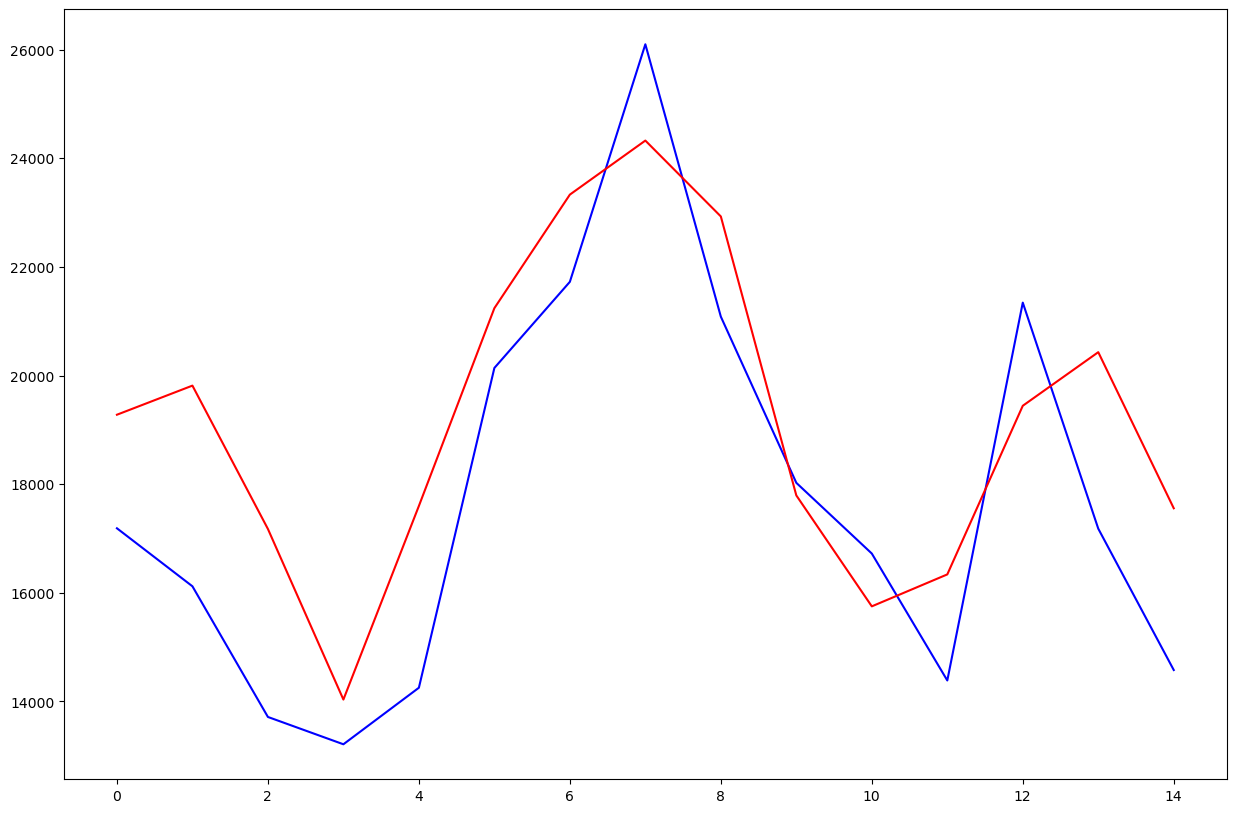

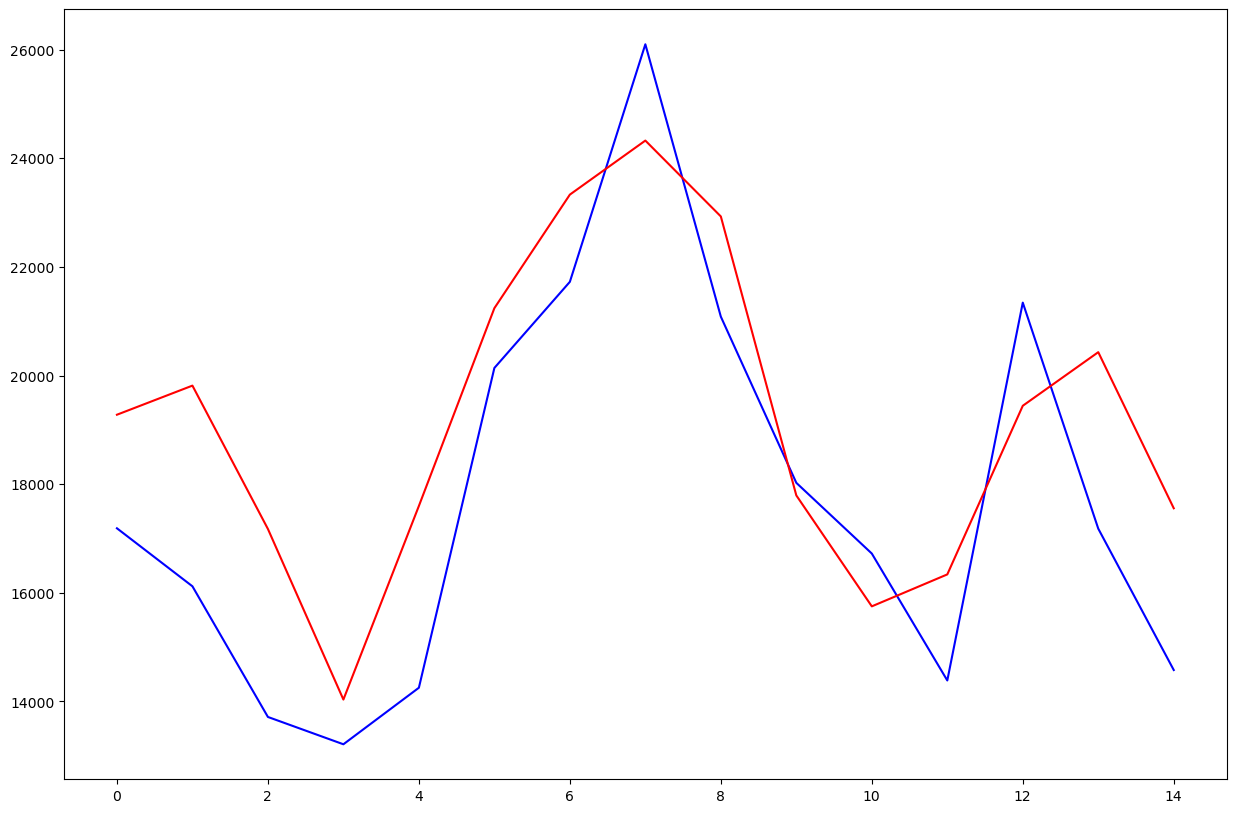

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(inv_y_test, color='b', label='Real ')
plt.plot(inv_y_pred, color='r', label='Predicted ')
plt.show()

###forecast Next Step

In [ ]:
type(x_test)

numpy.ndarray

In [ ]:
input_samples=x_test[-1:,:]

In [ ]:
input_samples.shape

(1, 12)

In [ ]:
next_step=model_mlp.predict(input_samples)
next_step=scaler.inverse_transform(next_step)

In [ ]:
next_step

array([[17555.465]], dtype=float32)

In [ ]:
x_train.shape

(81, 12)

##Simple_RNN

### 3D input shape=[n_sample,timesteps,input_dim]

In [ ]:
x_train_3d=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test_3d=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train_3d.shape,x_test_3d.shape

((81, 12, 1), (15, 12, 1))

In [ ]:
y_train.shape

(81, 1)

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
model_simple_RNN=Sequential()

model_simple_RNN.add(SimpleRNN(10,activation='relu',input_shape=(x_train_3d.shape[1],x_train_3d.shape[2]),return_sequences=True))

model_simple_RNN.add(SimpleRNN(20,activation='relu',return_sequences=True))

model_simple_RNN.add(SimpleRNN(30,activation='relu',return_sequences=False))

model_simple_RNN.add(Dense(n_step))

model_simple_RNN.compile(optimizer='adam',loss='mse')

In [ ]:
model_simple_RNN.fit(x_train_3d,y_train,epochs=100,batch_size=16)

Epoch 1/100
6/6 [==============================] - 6s 20ms/step - loss: 0.2802
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.2098
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.1478
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0913
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0559
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0558
Epoch 7/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0520
Epoch 8/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0444: 0s - loss: 0.044
Epoch 9/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0440
Epoch 10/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0441
Epoch 11/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0386
Epoch 12/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0334
Epoch 13/100
6/6 [=============

In [ ]:
# make predictions
predict_simpleRNN= model_simple_RNN.predict(x_test_3d)
predict_simpleRNN.shape

(15, 1)

In [ ]:
mse_simpleRNN= mean_squared_error(y_test, predict_simpleRNN)
mse_simpleRNN

0.04175046690681138

In [ ]:
# invert predictions
#inv_y_test= scaler.inverse_transform(y_test)
inv_y_pred_simpleRNN=scaler.inverse_transform(predict_simpleRNN)


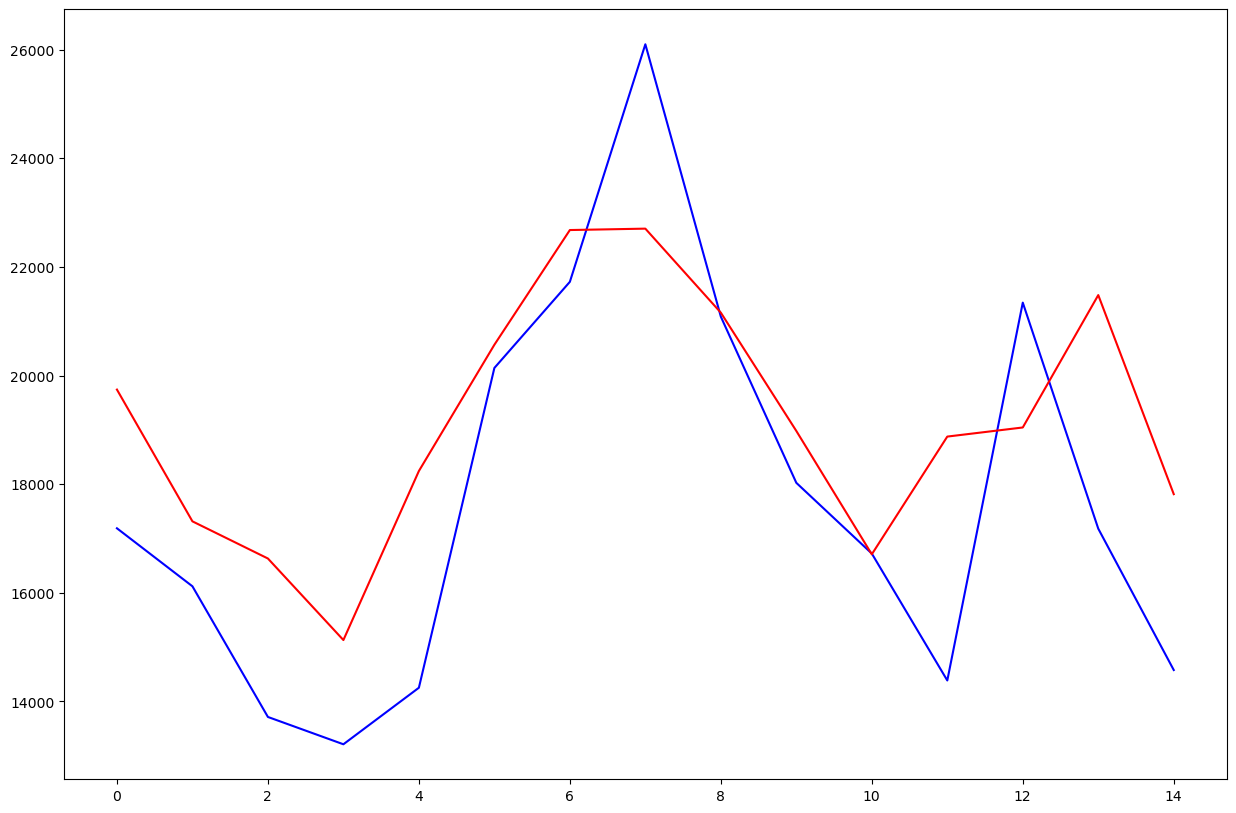

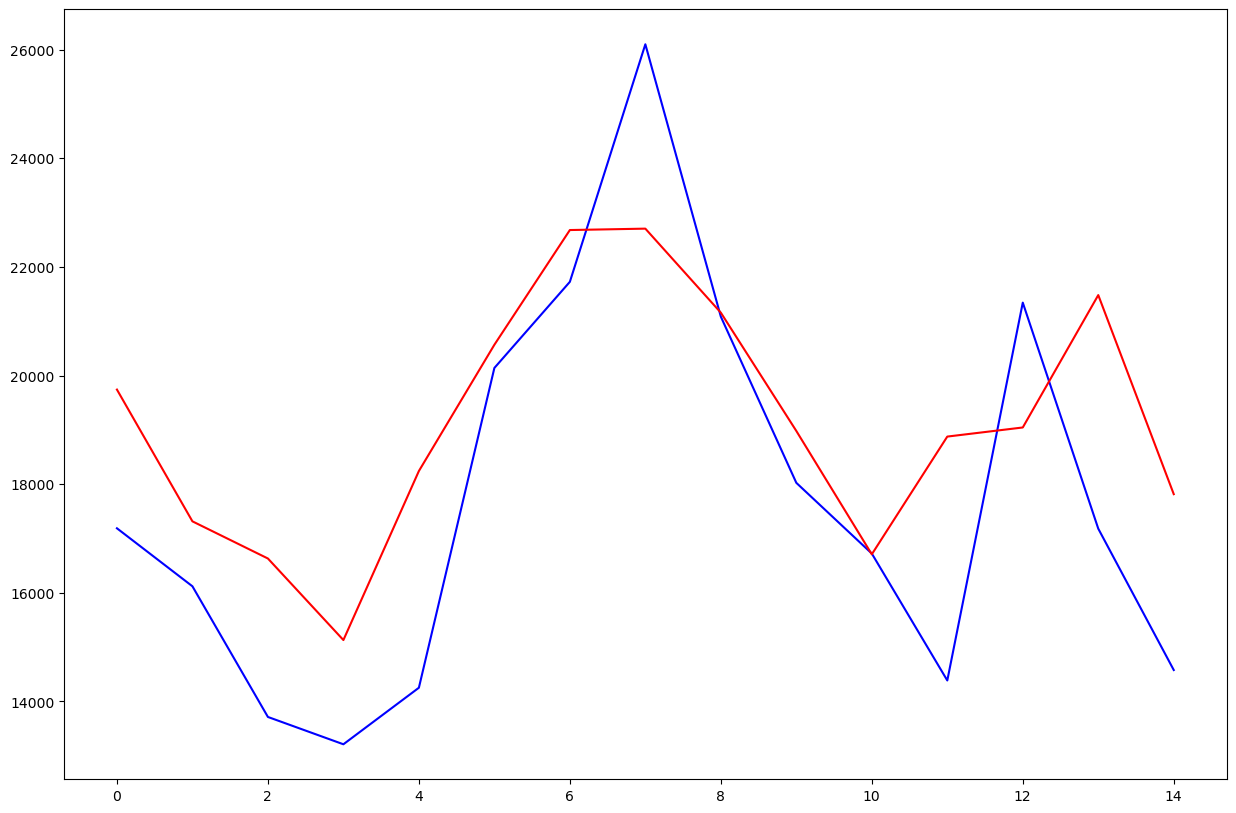

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(inv_y_test, color='b', label='Real ')
plt.plot(inv_y_pred_simpleRNN, color='r', label='Predicted ')
plt.show()

In [ ]:
#forecast next step

In [ ]:
input_samples=x_test_3d[-1:,:,:]

input_samples

array([[[0.16876453],
        [0.12843742],
        [0.2118977 ],
        [0.68395735],
        [0.811112  ],
        [1.        ],
        [0.61090853],
        [0.37349678],
        [0.27248041],
        [0.09116301],
        [0.6309256 ],
        [0.30801459]]])

In [ ]:

next_step_simpleRNN=model_simple_RNN.predict(input_samples)
next_step_simpleRNN=scaler.inverse_transform(next_step_simpleRNN)
next_step_simpleRNN

array([[17815.227]], dtype=float32)

In [ ]:
##LSTM

##GRU

In [ ]:
from keras.layers import GRU

In [ ]:
model_gru = Sequential()

model_gru.add(GRU(10,activation='relu',input_shape=(x_train_3d.shape[1],x_train_3d.shape[2]),return_sequences=True))
model_gru.add(GRU(20,activation='relu',return_sequences=True))
model_gru.add(GRU(30,activation='relu',return_sequences=False))
model_gru.add(Dense(n_step))
model_gru.compile(optimizer='adam',loss='mse')

In [ ]:
model_gru.fit(x_train_3d,y_train,batch_size=10,epochs=100)

Epoch 1/100
9/9 [==============================] - 13s 45ms/step - loss: 0.2651
Epoch 2/100
9/9 [==============================] - 0s 43ms/step - loss: 0.2007
Epoch 3/100
9/9 [==============================] - 0s 41ms/step - loss: 0.1460
Epoch 4/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0922
Epoch 5/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0550
Epoch 6/100
9/9 [==============================] - 0s 41ms/step - loss: 0.0575
Epoch 7/100
9/9 [==============================] - 0s 34ms/step - loss: 0.0576
Epoch 8/100
9/9 [==============================] - 0s 35ms/step - loss: 0.0523
Epoch 9/100
9/9 [==============================] - 0s 38ms/step - loss: 0.0516
Epoch 10/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0521
Epoch 11/100
9/9 [==============================] - 0s 36ms/step - loss: 0.0521
Epoch 12/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0517
Epoch 13/100
9/9 [==============================

In [ ]:
#predict on test set

y_gru=model_gru.predict(x_test_3d)
y_gru

array([[0.15837795],
       [0.30521107],
       [0.19957256],
       [0.14363095],
       [0.17576545],
       [0.3559449 ],
       [0.69532543],
       [0.76422524],
       [0.82087415],
       [0.31906617],
       [0.19028953],
       [0.1887227 ],
       [0.1848908 ],
       [0.51651627],
       [0.23037758]], dtype=float32)

In [ ]:
mse_gru = mean_squared_error(y_test,y_gru)
mse_gru

0.033019385878160716

In [ ]:
# invert predictions
#inv_y_test= scaler.inverse_transform(y_test)
inv_y_pred_gru=scaler.inverse_transform(y_gru)

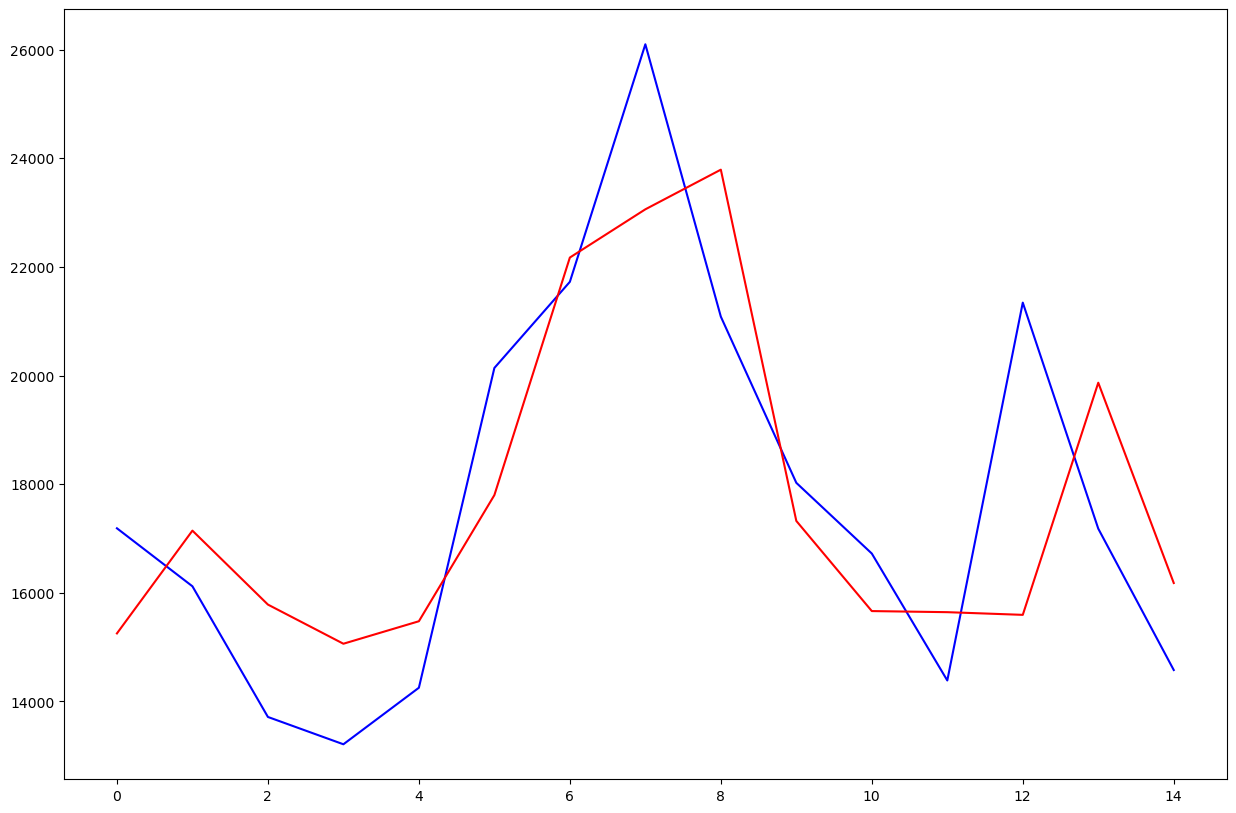

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(inv_y_test, color='b', label='Real ')
plt.plot(inv_y_pred_gru, color='r', label='Predicted ')
plt.show()

In [ ]:
input_samples = x_test_3d[-1:,:,:]

next_step_gru=model_gru.predict(input_samples)

In [ ]:
next_step_gru

array([[0.23037758]], dtype=float32)

In [ ]:
from keras.layers import LSTM

##LSTM

In [ ]:
model_lstm = Sequential()

model_lstm.add(LSTM(10,activation='relu',input_shape=(x_train_3d.shape[1],x_train_3d.shape[2]),return_sequences=True))
model_lstm.add(LSTM(20,activation='relu',return_sequences=True))
model_lstm.add(LSTM(30,activation='relu',return_sequences=False))
model_lstm.add(Dense(n_step))
model_lstm.compile(optimizer='adam',loss='mse')

In [ ]:
model_lstm.fit(x_train_3d,y_train,batch_size=10,epochs=100)

Epoch 1/100
9/9 [==============================] - 13s 33ms/step - loss: 0.2803
Epoch 2/100
9/9 [==============================] - 0s 50ms/step - loss: 0.2425
Epoch 3/100
9/9 [==============================] - 0s 51ms/step - loss: 0.1911
Epoch 4/100
9/9 [==============================] - 0s 43ms/step - loss: 0.1258
Epoch 5/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0527
Epoch 6/100
9/9 [==============================] - 0s 40ms/step - loss: 0.0550
Epoch 7/100
9/9 [==============================] - 0s 58ms/step - loss: 0.0474
Epoch 8/100
9/9 [==============================] - 0s 42ms/step - loss: 0.0466
Epoch 9/100
9/9 [==============================] - 0s 42ms/step - loss: 0.0469: 0s - loss: 0.046
Epoch 10/100
9/9 [==============================] - 0s 41ms/step - loss: 0.0481
Epoch 11/100
9/9 [==============================] - 0s 36ms/step - loss: 0.0488
Epoch 12/100
9/9 [==============================] - 0s 36ms/step - loss: 0.0467
Epoch 13/100
9/9 [============

In [ ]:
#predict on test set

y_lstm=model_lstm.predict(x_test_3d)
y_lstm

array([[0.39836273],
       [0.35411608],
       [0.17181271],
       [0.20333943],
       [0.36291105],
       [0.7027304 ],
       [0.8247283 ],
       [1.0627959 ],
       [0.91773444],
       [0.25509164],
       [0.27513415],
       [0.3630476 ],
       [0.48041716],
       [0.27423304],
       [0.17727077]], dtype=float32)

In [ ]:
mse_lstm=mean_squared_error(y_test,y_lstm)


In [ ]:
mse_lstm

0.028815733134198423

In [ ]:
# invert predictions
#inv_y_test= scaler.inverse_transform(y_test)
inv_y_pred_lstm=scaler.inverse_transform(y_lstm)

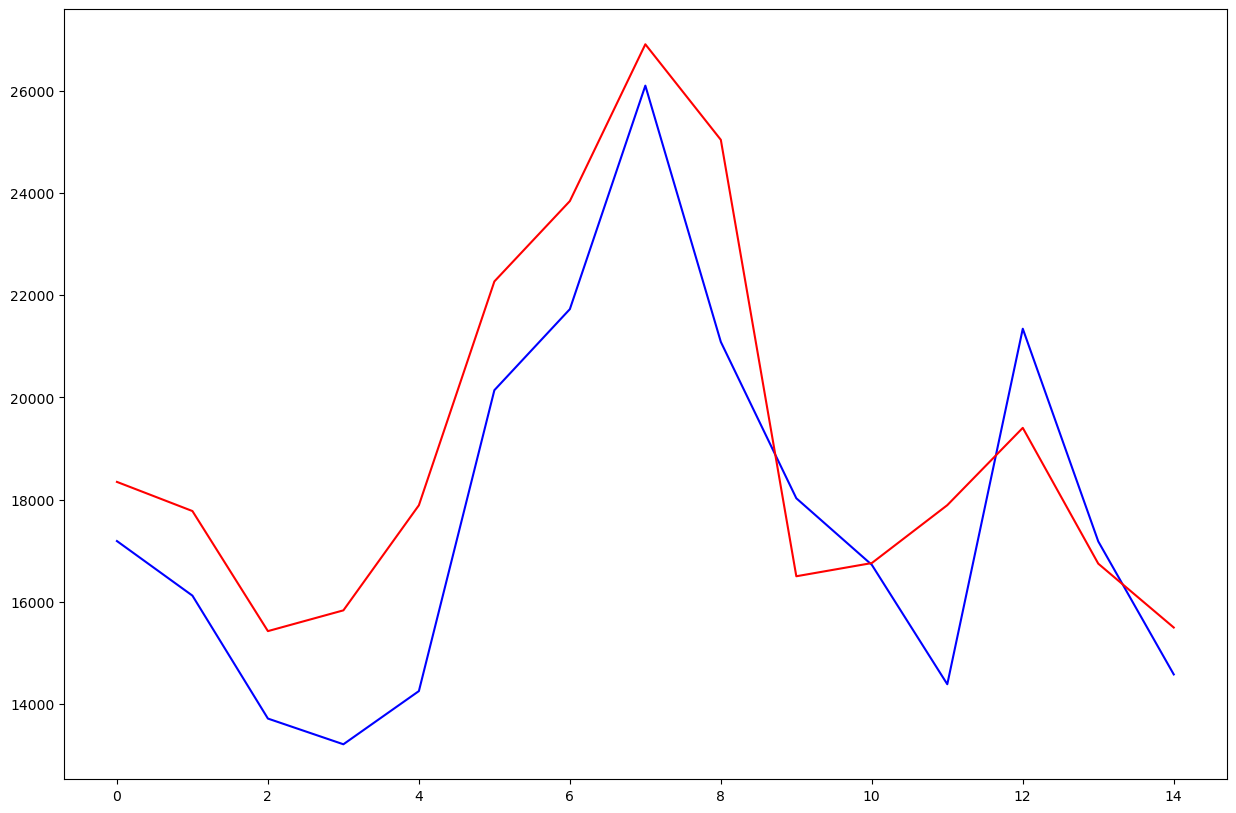

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(inv_y_test, color='b', label='Real ')
plt.plot(inv_y_pred_lstm, color='r', label='Predicted ')
plt.show()

In [ ]:
from keras.layers import Conv1D,MaxPooling1D,Flatten

##CNN

In [ ]:
model_cnn = Sequential()

model_cnn.add(Conv1D(filters=32 , kernel_size=3,activation='relu',input_shape=(x_train_3d.shape[1],x_train_3d.shape[2])))
model_cnn.add(Conv1D(filters=32 , kernel_size=3,activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=16 , kernel_size=3,activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))

model_cnn.add(Flatten())

#fully connected
model_cnn.add(Dense(100,activation='relu'))

model_cnn.add(Dense(n_step))

model_cnn.compile(loss='mse',optimizer='adam')

model_cnn.fit(x_train_3d,y_train,batch_size=10,epochs=100)

Epoch 1/100
9/9 [==============================] - 2s 7ms/step - loss: 0.2299
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0821
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0713
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0560
Epoch 5/100
9/9 [==============================] - ETA: 0s - loss: 0.051 - 0s 8ms/step - loss: 0.0536
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0486
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0544
Epoch 8/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0462
Epoch 9/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0452
Epoch 10/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0446
Epoch 11/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0444
Epoch 12/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0442
Epoch 13/100
9/9 [=============

In [ ]:
y_cnn=model_cnn.predict(x_test_3d)

In [ ]:
mse_cnn=mean_squared_error(y_test,y_cnn)

In [ ]:
mse_cnn

0.04161503303058937

In [ ]:
#compare Deep models

In [ ]:
result ={
    'Mlp':mse_mlp,
    'RNN':mse_simpleRNN,
    'GRU':mse_gru,
    'LSTM':mse_lstm,
    'CNN':mse_cnn
    
}

In [ ]:
result_df=pd.DataFrame.from_dict(result,orient='index')

result_df

,0
Mlp,0.032136
RNN,0.041750
GRU,0.033019
LSTM,0.028816
CNN,0.041615


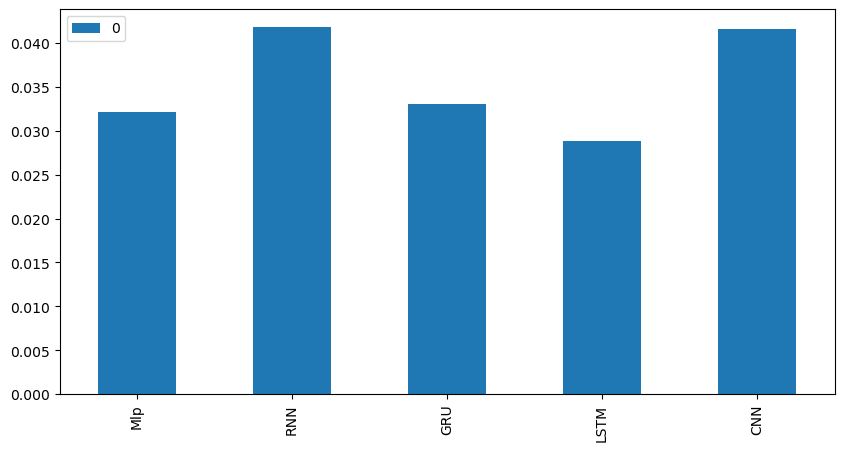

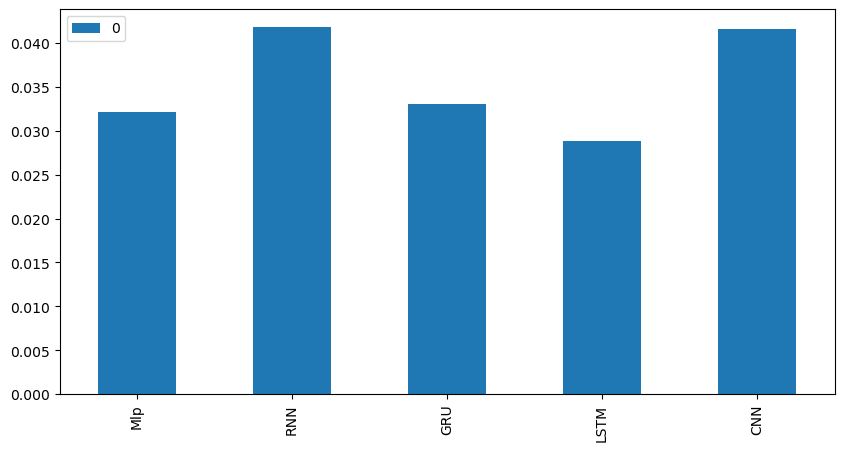

In [ ]:
result_df.plot(kind='bar',figsize=(10,5))
plt.show()

###Result Comparision